In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate

In [3]:
def readCSV(filepath) :
  df = pd.read_csv(filepath)
  return df

def getDenominationData(sortingKeyColumnName,df):
  datadict = {}
  keylist = df[sortingKeyColumnName]
  for key in keylist:
    datadict[key] = df.groupby(sortingKeyColumnName)['Denomination'].sum().get(key,0)

  datadict = dict(sorted(datadict.items(),key=lambda item:item[1],reverse=True))
  return datadict

def Plotter(datadict):
  names = list(datadict.keys())
  values = list(datadict.values())

  width = 0.9
  fig, ax = plt.subplots()
  ind = np.arange(len(values))
  ax.barh(range(len(datadict)), values, width, color = "green", tick_label=names)

  for x_val, val in enumerate(values):
      ax.text(val + 3, x_val-0.3 , str(val),
              color = 'blue', fontweight = 'normal', fontsize='x-small', linespacing=1)

  plt.tick_label = names
  plt.xscale("log")
  #figure = plt.figure()
  #figure.set_figwidth(10)
  #figure.set_figheight(500)
  plt.show()


In [25]:
politicalparty_df = readCSV("/content/sample_data/ECI_BondData_PoliticalParty.csv")
politicalparty_df.head(5)

Deno_Data_Party = getDenominationData("Name of the Political Party",politicalparty_df)


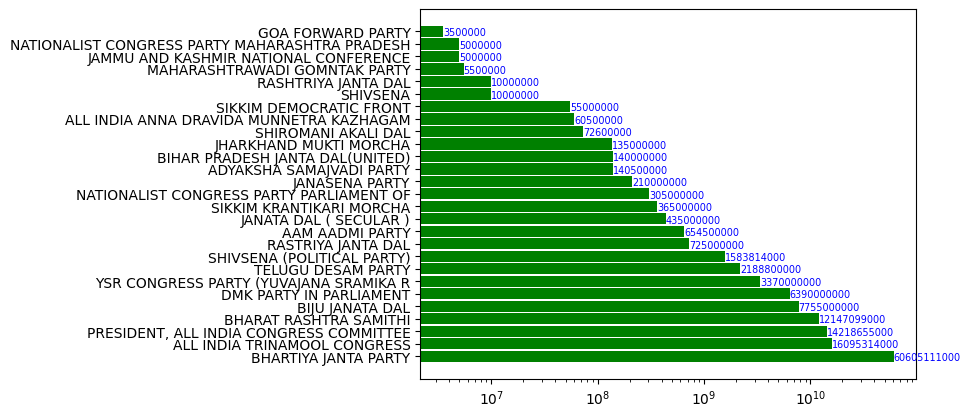

<Figure size 1000x50000 with 0 Axes>

In [26]:
Plotter(Deno_Data_Party)

In [5]:
purchasers_df = readCSV("/content/sample_data/ECI_BondData_Purchasers.csv")

Deno_Data_Purchasers = getDenominationData("Purchaser Name",purchasers_df)

In [9]:
transposed_data = [["Company", "Amount [Rs. lakhs]"]]
for company, amount in Deno_Data_Purchasers.items():
    transposed_data.append([company, float(amount/100000)])

print("=====================================================================")
print("||                            Summary                              ||")
print("=====================================================================")
print( "Number of companies : ", len(Deno_Data_Purchasers.keys()))
print()
print("=====================================================================")

print(tabulate(transposed_data, headers="firstrow", tablefmt="heavy_grid",floatfmt="0.4f"))

||                            Summary                              ||
Number of companies :  1316

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┓
┃ Company                                                       ┃   Amount [Rs. lakhs] ┃
┣━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━┫
┃ FUTURE GAMING AND HOTEL SERVICES PR                           ┃          120800.0000 ┃
┣━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━┫
┃ MEGHA ENGINEERING AND INFRASTRUCTURES LI MITED                ┃           82100.0000 ┃
┣━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━┫
┃ QWIKSUPPLYCHAINPRIVATELIMITED                                 ┃           41000.0000 ┃
┣━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━┫
┃ HALDIA ENERGY LIMITED                                         ┃           37700.0000 ┃
┣━━━━━━━━━━

In [27]:
purchasers_datadict = purchasers_df.groupby("Purchaser Name")['Date of Purchase'].agg(set).reset_index()

In [34]:
transposed_data_dates = [["Company", "Dates of Purchase"]]
for company, dates in purchasers_datadict.items():
    transposed_data_dates.append([company, dates])

print(tabulate(purchasers_datadict, headers="firstrow", tablefmt="heavy_grid"))

┏━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃    0 ┃ 14 REELS PLUS LLP                                             ┃ {'08/Apr/2022'}                                                                                                                                                                                                                                                                                              ┃
┣━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [41]:
purchasers_df['Date of Purchase'] = pd.to_datetime(purchasers_df['Date of Purchase'], format='%d/%b/%Y')
date_datadict = purchasers_df.groupby("Date of Purchase")['Purchaser Name'].agg(set).reset_index()
date_datadict = date_datadict.sort_values(by='Date of Purchase')
date_datadict['Date of Purchase'] = date_datadict['Date of Purchase'].dt.strftime('%d/%b/%Y')

In [42]:
companies_buying_on_same_date = [["Dates of Purchase","Company Names"]]
for dates,company in date_datadict.items():
    companies_buying_on_same_date.append([dates,company])

print(tabulate(date_datadict, headers="firstrow", tablefmt="heavy_grid"))

┏━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━